In [ ]:
!pip install pyTelegramBotAPI

<Figure size 432x288 with 0 Axes>

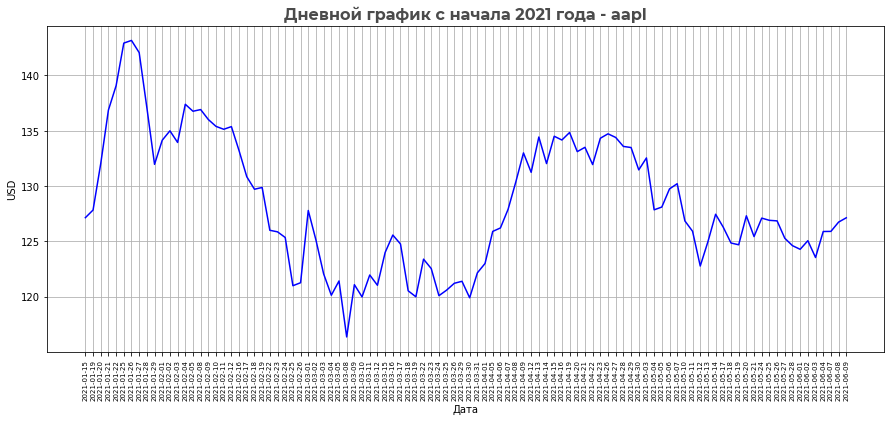

In [6]:
import telebot
import requests
from telebot import types
import matplotlib.pyplot as plt
from PIL import Image
function_name = ''
bot = telebot.TeleBot("1799078640:AAFsJy-RhRDhZHNnXJiAObBqYIEj3xNnTr0")
        
@bot.message_handler(commands=['start'])
def send_keyboard(message, text="Привет! Поинвестируем?"):
    keyboard = types.ReplyKeyboardMarkup(row_width=2)
    itembtn1 = types.KeyboardButton('Общая информация по тикеру') 
    itembtn2 = types.KeyboardButton('О компании')
    itembtn3 = types.KeyboardButton('Инвестиционная рекомендация')
    itembtn4 = types.KeyboardButton("Таня")
    itembtn5 = types.KeyboardButton('Таня')
    itembtn6 = types.KeyboardButton('Рома')
    itembtn7 = types.KeyboardButton('Рома')
    keyboard.add(itembtn1, itembtn2, itembtn3, itembtn4, itembtn5, itembtn6, itembtn7)
    msg = bot.send_message(message.from_user.id, text=text, reply_markup=keyboard)
    bot.register_next_step_handler(msg, get_info)      

def fn_way(msg):
    if msg.text == 'Да':
        msg = bot.send_message(msg.chat.id, 'Введите тикер!')
        bot.register_next_step_handler(msg, function_name)
        print(msg)
        print(function_name)
    elif msg.text == 'Нет':
        send_keyboard(msg, 'Выберите другую функцию!')

def fn1(msg):
    function_name = 'fn1'
    stock_ticker = msg.text
    if len(stock_ticker) <= 4 and len(stock_ticker) >= 0: 
        try:
            bot.reply_to(msg, f"Тикер: {stock_ticker}. Нейросеть обрабатывает информацию...")
            url = f'https://financialmodelingprep.com/api/v3/profile/{stock_ticker}?apikey=b59a97db01de231d304f7c4c20a0670d'
            result = requests.get(url)
            result_json = result.json()[0]
            cur = str(result_json["currency"])
            response = str(result_json["symbol"]) + '. Цена сейчас: ' + str(result_json["price"]) + ' ' + cur
            bot.send_message(msg.chat.id, response)   
            
            url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_ticker}&apikey=YD82B9BBTLJU86CO'
            result = requests.get(url)
            x = result.json()['Time Series (Daily)']
            c = []
            t = []
            for key in x.keys():
                t.append(key)
                c.append(float(x[key]['4. close']))
            c.reverse()
            t.reverse()
            plt.clf()
            plt.figure(figsize=(15, 6))
            plt.plot(t, c, label="Close Price - Day", color = 'blue');
            plt.xticks(size=7, rotation=90)
            plt.xlabel('Дата')
            plt.ylabel(f'{cur}')
            plt.title(f'Дневной график с начала 2021 года - {stock_ticker}', fontsize = 16, fontfamily = 'montserrat', fontweight = 'bold', alpha = 0.7, color = 'black')
            plt.grid(True);
            plt.savefig('saved_figure.png', dpi = 200)
            img = Image.open(r'saved_figure.png')
            bot.send_photo(msg.chat.id, img)
    
            msg = bot.send_message(msg.chat.id, 'Ещё по тикеру?) Да/Нет')
            bot.register_next_step_handler(msg, fn_way)

        except:
            bot.send_message(msg.chat.id, 'Только американские акции!')

def fn2(msg):
    function_name = 'fn2'
    stock_ticker = msg.text
    if len(stock_ticker) <= 4 and len(stock_ticker) >= 0: 
        try:            
            bot.reply_to(msg, f"Тикер: {stock_ticker}. Ищем информацию...")
            url = f'https://financialmodelingprep.com/api/v3/profile/{stock_ticker}?apikey=b59a97db01de231d304f7c4c20a0670d'
            result = requests.get(url)
            result_json = result.json()[0]
            response = str(result_json["description"])
            bot.send_message(msg.chat.id, response)
            msg = bot.send_message(msg.chat.id, 'Ещё одну компанию? Для этого введите ещё один тикер. Или попробуем другую функцию?')
            bot.register_next_step_handler(msg, fn2)
        except:
            bot.send_message(msg.chat.id, 'Только американские акции!')            

            
def get_info(message):
    if  message.text == "Общая информация по тикеру":
        msg = bot.send_message(message.chat.id, 'Введите тикер акции! (пример AAPL)')
        bot.register_next_step_handler(msg, fn1)
    elif message.text == "О компании":
        msg = bot.send_message(message.chat.id, 'Введите тикер акции компании! (пример AAPL)')
        bot.register_next_step_handler(msg, fn2)    
    
bot.polling(none_stop = True)

In [5]:
YD82B9BBTLJU86CO

NameError: name 'YD82B9BBTLJU86CO' is not defined

In [ ]:
@bot.message_handler(commands=['about'])
def get_info_1(message):
    bot.send_message(message.chat.id, 'По какой акции интересует информация? (пример: AAPL)')
    
        
@bot.message_handler(commands=['recommendation'])
def get_info_2(message):
    bot.send_message(message.chat.id, 'По какой акции интересует информация? (пример: AAPL)')
    stock_ticker = message.text
    if len(message.text) <= 4 and len(message.text) >= 0: 
        url = f'https://financialmodelingprep.com/api/v3/rating/{stock_ticker}?apikey=b59a97db01de231d304f7c4c20a0670d'
        result = requests.get(url)
        result_json = result.json()[0]
        response = str(result_json["ratingScore"])+ ' out of 5.' + ' ' + str(result_json["ratingRecommendation"]) + '!'
        bot.send_message(message.chat.id, response)
    else:
        bot.send_message(message.chat.id, 'error')

In [ ]:
    if len(stock_ticker) <= 4 and len(stock_ticker) >= 0: 
        try:
            bot.reply_to(message, f"Тикер: {stock_ticker}. Нейросеть обрабатывает информацию...")

            url = f'https://financialmodelingprep.com/api/v3/profile/{stock_ticker}?apikey=b59a97db01de231d304f7c4c20a0670d'
            result = requests.get(url)
            result_json = result.json()[0]
            cur = str(result_json["currency"])
            response = str(result_json["symbol"]) + '. Цена сейчас: ' + str(result_json["price"]) + ' ' + cur
            bot.send_message(message.chat.id, response)

            url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_ticker}&apikey=YD82B9BBTLJU86CO'
            result = requests.get(url)
            x = result.json()['Time Series (Daily)']
            c = []
            t = []
            for key in x.keys():
                t.append(key)
                c.append(float(x[key]['4. close']))
            c.reverse()
            t.reverse()
            plt.clf()
            plt.figure(figsize=(15, 6))
            plt.plot(t, c, label="Close Price - Day", color = 'blue');
            plt.xticks(size=7, rotation=90)
            plt.xlabel('Дата')
            plt.ylabel(f'{cur}')
            plt.title(f'Дневной график с начала 2021 года - {stock_ticker}', fontsize = 16, fontfamily = 'montserrat', fontweight = 'bold', alpha = 0.7, color = 'black')
            plt.grid(True);
            plt.savefig('saved_figure.png', dpi = 200)

            img = Image.open(r'saved_figure.png')
            bot.send_photo(msg.chat.id, img)

            bot.send_message(msg.chat.id, 'Ещё по тикеру?)')
        except:
            bot.send_message(message.chat.id, 'Онли американские акции)')
    else: 
        bot.send_message(message.chat.id, 'error, введи по-человечески')

In [ ]:
@bot.message_handler(content_types = ['text']) 

In [2]:
msg

NameError: name 'msg' is not defined

In [ ]:
def fn_way(msg):
    if msg.text == 'Да':
        bot.send_message(msg.chat.id, 'Введите тикер!')
        bot.register_next_step_handler(msg, function_name)
    elif msg.text == 'Нет':
        send_keyboard(msg, 'Выберите другую функцию!')